In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.shape

(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
def chi_test(feature):
    crosstab = pd.crosstab(train["Survived"],train[feature])
    test= stats.chi2_contingency(crosstab)
    return test

In [12]:
chi_test('Fare')

(425.8083805791106,
 1.1647635739939964e-11,
 247,
 array([[ 9.24242424,  0.61616162,  0.61616162,  0.61616162,  0.61616162,
          0.61616162,  1.23232323,  1.23232323,  0.61616162,  0.61616162,
          1.23232323,  0.61616162,  4.31313131,  1.23232323,  2.46464646,
          0.61616162,  7.39393939,  9.24242424,  8.01010101,  0.61616162,
          1.84848485,  0.61616162,  2.46464646,  0.61616162,  2.46464646,
          0.61616162,  0.61616162,  2.46464646,  1.23232323,  0.61616162,
         20.94949495,  9.85858586,  0.61616162,  3.6969697 ,  0.61616162,
          1.23232323,  8.01010101,  0.61616162,  2.46464646,  0.61616162,
         23.41414141, 11.09090909,  0.61616162, 26.49494949,  0.61616162,
          0.61616162,  0.61616162,  0.61616162,  0.61616162,  0.61616162,
          0.61616162,  0.61616162,  0.61616162,  0.61616162,  8.01010101,
          0.61616162,  0.61616162,  0.61616162,  1.23232323,  0.61616162,
          1.23232323,  1.23232323,  0.61616162,  0.61616162, 

p-value is less than 0.05, we can reject H_0 and conclude independence

##### There is independence between Survived and the other categorical features

## Next we visualise the data in our exploration

### create functions for the bar and facet plots to compare variables against Survived

In [8]:
def bar(feature):
    Survived = train[train['Survived']==1][feature].value_counts()
    Didnt = train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([Survived,Didnt])
    df.index = ['Survived','Didnt']
    df.plot(kind='bar', stacked=False, figsize=(10,5)) 

In [9]:
def facet(feature):
    facet=sns.FacetGrid(train,hue="Survived",aspect=5)
    facet.map(sns.kdeplot,feature,shade=True)
    facet.set(xlim=(0,train[feature].max()))
    facet.add_legend()
    plt.show()


In [10]:
def cross(feature1,feature2):
    p = np.array([train['Pclass']])
    s = np.array([train['Sex']])
    e = np.array([train['Embarked']])
    su = np.array([train['Survived']])
    crosstab= pd.crosstab(feature1,feature2, margins=True, normalize='index')
    return crosstab

### Visualisation of the categorical variables; Pclass, Sex and Embarked


3    491
1    216
2    184
Name: Pclass, dtype: int64


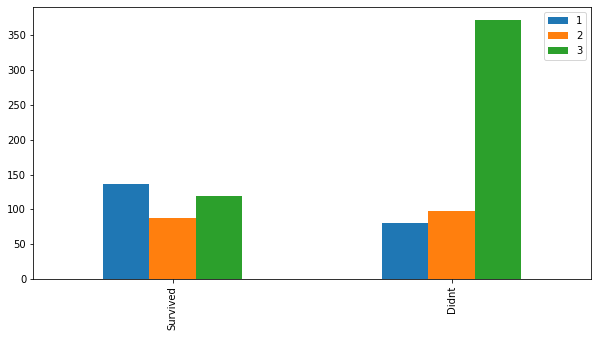

In [11]:
bar('Pclass')
print(train.Pclass.value_counts())

In [84]:
print(train.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [85]:
pd.crosstab(train['Survived'],train['Pclass'],margins=True,normalize='index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953
All,0.242424,0.206510,0.551066


### 40% of the people that survived were in 1st class, whilst it onl had 24% of the passengers

In [86]:
pd.crosstab(train["Survived"],train['Sex'], margins=True, normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713
All,0.352413,0.647587


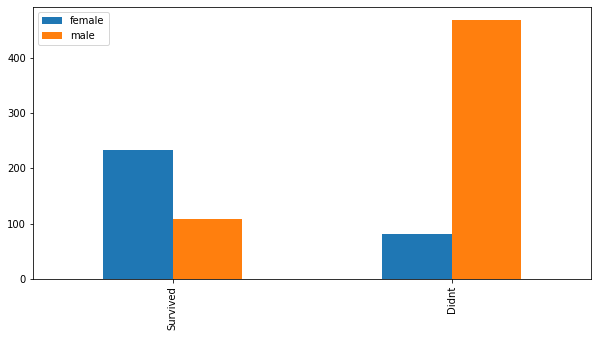

In [87]:
bar('Sex')

### Females accounted for 35% of the passngers but 68% of the Survivors, indicating that Sex may have contributed to Survival

In [88]:
pd.crosstab(train["Survived"],train['Embarked'], margins=True, normalize='index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.273529,0.088235,0.638235
All,0.188976,0.086614,0.724409


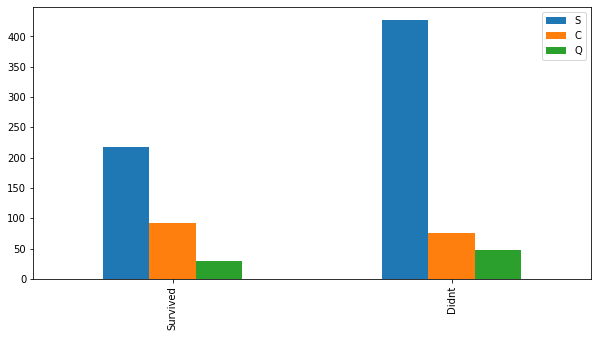

In [89]:
bar('Embarked')

### Cherbourg accounted for 19% of the total passengers but 27% of the survivors. People who boarded at Cherbourg were more likely to survive  

## Next we check visualise the numeric data; Age, SibSp, Parch and Fare

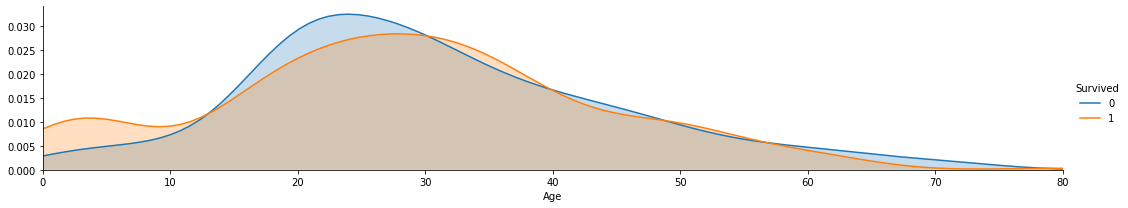

In [90]:
facet("Age")

### We may need to break Age down into subgroups to better understand the relation to survival

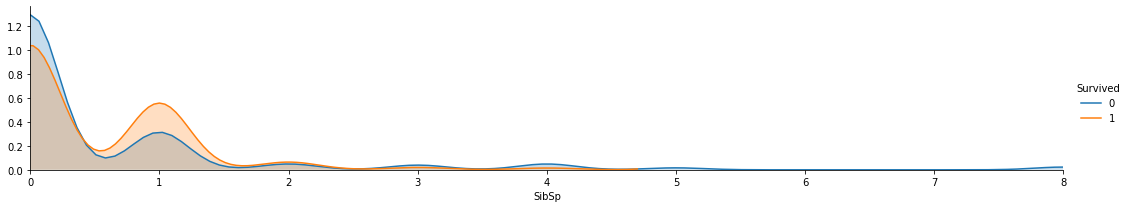

In [91]:
facet('SibSp')

In [92]:
pd.crosstab(train["Survived"],train['SibSp'], margins=True, normalize='index')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,0.724954,0.176685,0.027322,0.021858,0.027322,0.009107,0.012750
1,0.614035,0.327485,0.038012,0.011696,0.008772,0.000000,0.000000
All,0.682379,0.234568,0.031425,0.017957,0.020202,0.005612,0.007856


### People travelling with one other person were more likely to survive

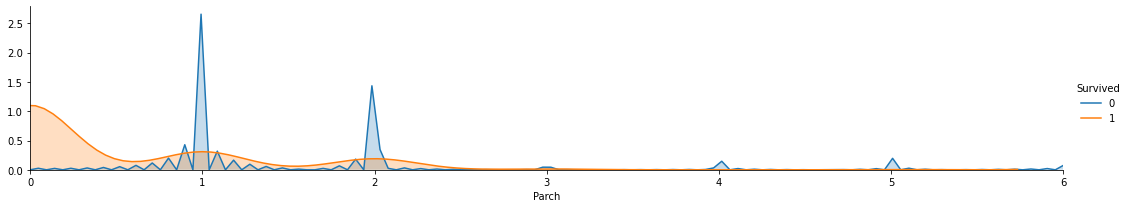

In [93]:
facet('Parch')

In [94]:
parch=pd.DataFrame([train["Parch"],train['Survived']]) 


### Parch doesnt seem to contribute to survival

In [95]:
import statistics
print(statistics.mode(train['Fare']))

8.05


In [96]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

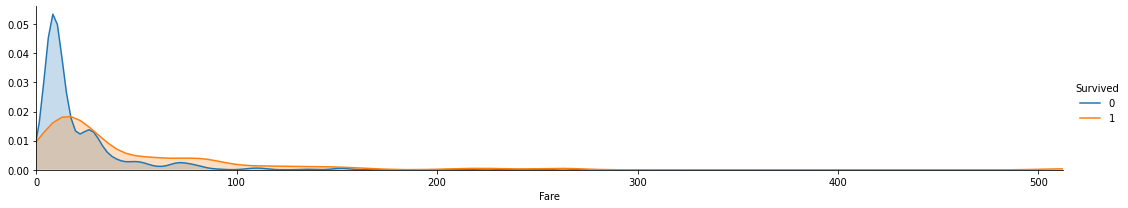

In [97]:
facet('Fare')

### A lot of people bought the <10 tickets and that accounts as such they account for most of the deaths